<a href="https://colab.research.google.com/github/Anirudh-kumar77/ai-and-ds/blob/main/stock%20exchange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

R2 Score: 0.7099080556709862
MSE: 65.10411630398981


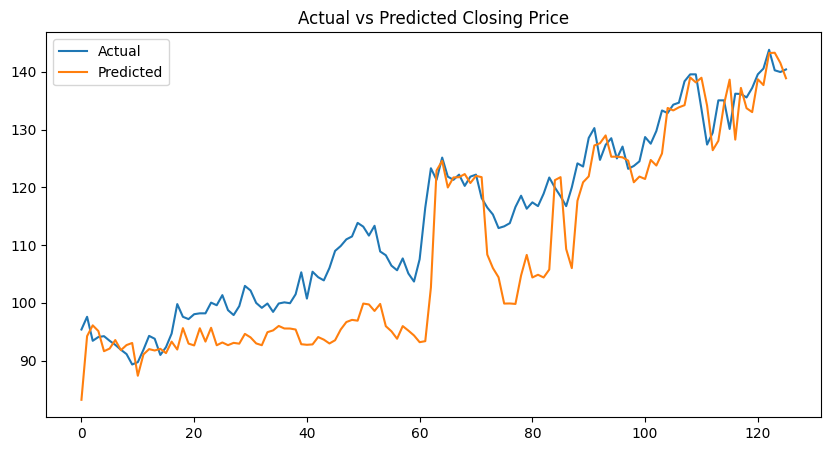

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("/content/zomato.csv")

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date
df = df.sort_values('Date')

# Create the target: next day's Close
df['Target'] = df['Close'].shift(-1)

# Drop the last row (it has no target)
df = df[:-1]

# Features to use (you can add more technical indicators later)
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
X = df[features]
y = df['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Actual vs Predicted Closing Price")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
# Sat random seed for reproducibility
np.random.seed(42)
# Number of customers
n_customers = 500
# Generate synthetic features
ages = np.random.randint (18, 70, n_customers)
genders = np.random.randint(0, 2, n_customers) # 0: Female, 1: Male
income = np.random.normal(50, 15, n_customers) .round(2) # Mean: 50k, Std: 15k
purchase_freq = np.random.poisson(3, n_customers) # Avg 3 purchases/month
# Simulate churn: likely to churn if income < 40 and purchase_freq < 3
churn = ((income < 40) & (purchase_freq < 3)).astype(int)
# Create DataFrame
df_customers = pd.DataFrame({
'Age': ages,
'Genders': genders,
'Income': income,
'PurchaseFrequency': purchase_freq,
'Churn': churn
})
#Save to csv
df_customers.to_csv("customers.csv",index=False)

print("Customer data created and saved to 'customers.csv'")
print(df_customers.head())


Customer data created and saved to 'customers.csv'
   Age  Genders  Income  PurchaseFrequency  Churn
0   56        1   24.45                  2      1
1   69        0   49.17                  2      0
2   46        0   55.76                  4      0
3   32        1   49.51                  4      0
4   60        0   18.99                  1      1


In [ ]:
#Save to csv
df_customers.to_csv("customers.csv",index=False)

print("Customer data created and saved to 'customers.csv'")
print(df_customers.head())

Customer data created and saved to 'customers.csv'
   Age  Genders  Income  PurchaseFrequency  Churn
0   56        1   24.45                  2      1
1   69        0   49.17                  2      0
2   46        0   55.76                  4      0
3   32        1   49.51                  4      0
4   60        0   18.99                  1      1


In [ ]:
import matplotlib. pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
df = pd.read_csv("customers.csv")
# Show top rows
df.head()

,Age,Genders,Income,PurchaseFrequency,Churn
0,56,1,24.45,2,1
1,69,0,49.17,2,0
2,46,0,55.76,4,0
3,32,1,49.51,4,0
4,60,0,18.99,1,1
